In [1]:
import pandas as pd 
import numpy as np
import spacy


In [2]:
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
#Reading the csv file
df=pd.read_csv('F:/MinorProject/data_set/0.csv', encoding='latin1',header=None)
df
sf=df

In [4]:
#only taking the 6 and 4 column. df ->dataframes is a 1d array contatning dictionaries where cols are dictionaries.
df=sf[[6,4]]
df.columns=['reviews','rating']
df.head()

,reviews,rating
0,text,rating
1,We went here with our kids for Xmas holiday an...,5.0
2,We have spent in this hotel our summer holiday...,5.0
3,I visited Hotel Baltic with my husband for som...,5.0
4,I've travelled quite a numbers of hotels but t...,5.0


In [5]:
df['rating'].value_counts()

5.0       26447
4.0       13339
3.0        5615
2.0        2418
1.0        2181
rating        1
Name: rating, dtype: int64

### Word Counts

In [6]:
#lambda is simply a function which can take multiple inputs as a parameter but can have one step as a processing.
#x = lambda a, b, c : a + b + c
#print(x(5, 6, 2))

#here it take every row from the reviews columns and send the number of words in that text.
df['word_counts']=df['reviews'].apply(lambda x: len(str(x).split()))
df.head()


<ipython-input-6-06158bbf8db9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts']=df['reviews'].apply(lambda x: len(str(x).split()))


,reviews,rating,word_counts
0,text,rating,1
1,We went here with our kids for Xmas holiday an...,5.0,46
2,We have spent in this hotel our summer holiday...,5.0,116
3,I visited Hotel Baltic with my husband for som...,5.0,52
4,I've travelled quite a numbers of hotels but t...,5.0,109


### Character Counts

In [7]:
df['char_counts']=df['reviews'].apply(lambda x: len(x))
df.head()

<ipython-input-7-505f771ab979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_counts']=df['reviews'].apply(lambda x: len(x))


,reviews,rating,word_counts,char_counts
0,text,rating,1,4
1,We went here with our kids for Xmas holiday an...,5.0,46,248
2,We have spent in this hotel our summer holiday...,5.0,116,645
3,I visited Hotel Baltic with my husband for som...,5.0,52,281
4,I've travelled quite a numbers of hotels but t...,5.0,109,641


### Average Word Length

In [8]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0;
    for word in words:
        word_len=word_len+len(word);
    return word_len/len(words)

In [9]:
df['avg_word_len']=df['reviews'].apply(lambda x: get_avg_word_len(x))

<ipython-input-9-2e7047c7bc7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_word_len']=df['reviews'].apply(lambda x: get_avg_word_len(x))


In [10]:
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len
0,text,rating,1,4,4.000000
1,We went here with our kids for Xmas holiday an...,5.0,46,248,4.413043
2,We have spent in this hotel our summer holiday...,5.0,116,645,4.568966
3,I visited Hotel Baltic with my husband for som...,5.0,52,281,4.423077
4,I've travelled quite a numbers of hotels but t...,5.0,109,641,4.889908


In [11]:
# Drop first row 
# by selecting all rows from first row onwards
df = df.iloc[1: , :]

In [12]:
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len
1,We went here with our kids for Xmas holiday an...,5.0,46,248,4.413043
2,We have spent in this hotel our summer holiday...,5.0,116,645,4.568966
3,I visited Hotel Baltic with my husband for som...,5.0,52,281,4.423077
4,I've travelled quite a numbers of hotels but t...,5.0,109,641,4.889908
5,We decided for this family holiday destination...,4.0,259,1335,4.158301


### Stop Words

In [13]:
print(STOP_WORDS)


{'if', 'too', 'however', 'give', 'third', 'cannot', 'when', 'across', 'whence', 'therein', 'indeed', 'seems', 'anyhow', "'ve", 'you', 'never', 'how', 'ten', 'n’t', 'that', 'same', 'amount', 'please', 'beforehand', 'fifty', 'somewhere', '’m', 'off', '‘m', 'almost', 'anything', 'them', 'amongst', 'see', 'thereupon', 'enough', 'eight', 'once', 'was', 'four', 'than', 'often', "n't", 'at', 'seeming', '’re', 'of', 'latterly', 'still', 'who', 'together', 'among', 'ca', 'which', 'then', 'from', 'thence', 'regarding', 'around', 'him', 'his', 'only', 'during', 'whereby', 'seemed', 'also', 'afterwards', 'twelve', 'moreover', 'and', 'hundred', 'top', 'whether', 'through', 'always', 'may', 'first', 'why', 'because', 'last', 'any', '‘ve', 'himself', 'behind', 'these', 'most', 'much', 'with', '‘re', 'wherever', 'keep', 'via', 'against', 'after', 'itself', 'made', 'yours', 'would', 'one', 'should', 'again', 'further', 'nevertheless', 'thereafter', 'does', 'five', 'really', 'per', 'less', 'hereby', 'no

In [14]:
#count of stop words.
df['stop_words']=df['reviews'].apply(lambda x:len([r for r in x.split() if r in STOP_WORDS]))
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,We went here with our kids for Xmas holiday an...,5.0,46,248,4.413043,19
2,We have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,I visited Hotel Baltic with my husband for som...,5.0,52,281,4.423077,27
4,I've travelled quite a numbers of hotels but t...,5.0,109,641,4.889908,54
5,We decided for this family holiday destination...,4.0,259,1335,4.158301,103


### PreProcessing and Cleaning

In [15]:
#LOWERCASE CONVERSION
df['reviews']=df['reviews'].apply(lambda x:x.lower())
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,we went here with our kids for xmas holiday an...,5.0,46,248,4.413043,19
2,we have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,i visited hotel baltic with my husband for som...,5.0,52,281,4.423077,27
4,i've travelled quite a numbers of hotels but t...,5.0,109,641,4.889908,54
5,we decided for this family holiday destination...,4.0,259,1335,4.158301,103


## Contraction and Expansion

In [16]:
'''
Contractions are those which are written in short and to know the meaning of the word it should be expanded.
As don't-->>>>>>donot.
'''

"\nContractions are those which are written in short and to know the meaning of the word it should be expanded.\nAs don't-->>>>>>donot.\n"

In [17]:
def cont_to_exp(text):
# creating an empty list
  expanded_words = []   
  for word in text.split():
  # using contractions.fix to expand the shortened words
    expanded_words.append(contractions.fix(word))  
   
  expanded_text = ' '.join(expanded_words)
  return expanded_text 

In [18]:
# contracted text
import contractions
df['reviews']=df['reviews'].apply(lambda x: cont_to_exp(x))
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,we went here with our kids for xmas holiday an...,5.0,46,248,4.413043,19
2,we have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,i visited hotel baltic with my husband for som...,5.0,52,281,4.423077,27
4,i have travelled quite a numbers of hotels but...,5.0,109,641,4.889908,54
5,we decided for this family holiday destination...,4.0,259,1335,4.158301,103


In [19]:
#Special char removal or punctuation removal

import re
df['reviews']=df['reviews'].apply(lambda x:re.sub('[^A-Z a-z 0-9]+','',x))
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,we went here with our kids for xmas holiday an...,5.0,46,248,4.413043,19
2,we have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,i visited hotel baltic with my husband for som...,5.0,52,281,4.423077,27
4,i have travelled quite a numbers of hotels but...,5.0,109,641,4.889908,54
5,we decided for this family holiday destination...,4.0,259,1335,4.158301,103


In [20]:
#Remove Multiple Spaces
df['reviews']=df['reviews'].apply(lambda x:" ".join(x.split()))
df.head()


,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,we went here with our kids for xmas holiday an...,5.0,46,248,4.413043,19
2,we have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,i visited hotel baltic with my husband for som...,5.0,52,281,4.423077,27
4,i have travelled quite a numbers of hotels but...,5.0,109,641,4.889908,54
5,we decided for this family holiday destination...,4.0,259,1335,4.158301,103


### Remove HTML Tags

In [21]:
#Removing HTML TAGS
from bs4 import BeautifulSoup
x='<h1>Hello I am Gian</h1>'
BeautifulSoup(x,'lxml').get_text()


'Hello I am Gian'

In [22]:
df['reviews']=df['reviews'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,we went here with our kids for xmas holiday an...,5.0,46,248,4.413043,19
2,we have spent in this hotel our summer holiday...,5.0,116,645,4.568966,42
3,i visited hotel baltic with my husband for som...,5.0,52,281,4.423077,27
4,i have travelled quite a numbers of hotels but...,5.0,109,641,4.889908,54
5,we decided for this family holiday destination...,4.0,259,1335,4.158301,103


# Spacy and NLP

In [23]:
###Remove the stop words

x="this is ML I really enjoy"
" ".join([t for t in x.split() if t not in STOP_WORDS])


'ML I enjoy'

In [24]:
df['reviews']=df['reviews'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS])) 
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,went kids xmas holiday liked large options foo...,5.0,46,248,4.413043,19
2,spent hotel summer holidays summer 2014 2015 h...,5.0,116,645,4.568966,42
3,visited hotel baltic husband bike riding area ...,5.0,52,281,4.423077,27
4,travelled numbers hotels best place achieve ex...,5.0,109,641,4.889908,54
5,decided family holiday destination saw ranking...,4.0,259,1335,4.158301,103


### Convert into Base form of Word

In [25]:
nlp=spacy.load('en_core_web_sm')

In [26]:
#Convert into base or root form of word
nlp=spacy.load('en_core_web_sm')
def make_to_base(x):
   x_list = [] 
   doc = nlp(x)

   for token in doc:
      lemma = str(token.lemma_)
      if lemma == '-PRON-' or lemma == 'be':
           lemma= token.text
      x_list.append(lemma)
   return " ".join(x_list)

In [27]:
df['reviews']=df['reviews'].apply(lambda x: make_to_base(x)) 
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,go kid xmas holiday like large option food bre...,5.0,46,248,4.413043,19
2,spend hotel summer holiday summer 2014 2015 hu...,5.0,116,645,4.568966,42
3,visit hotel baltic husband bike riding area th...,5.0,52,281,4.423077,27
4,travel number hotel good place achieve excelle...,5.0,109,641,4.889908,54
5,decide family holiday destination see rank fam...,4.0,259,1335,4.158301,103


### Common Word Removal

In [28]:
#Common word removal
text=" ".join(df['reviews'])
text = text.split()
text
freq_comm = pd.Series(text).value_counts()
f20 = freq_comm[:20]
f20

room          67381
hotel         57562
stay          45790
good          33963
staff         32922
great         26332
breakfast     25554
clean         22050
nice          19978
night         19137
place         18340
time          17425
day           17231
pool          16242
friendly      15826
food          15698
restaurant    15266
bed           14155
area          13663
service       13609
dtype: int64

In [29]:
df['reviews']=df['reviews'].apply(lambda x:" ".join([t for t in x.split() if t  not in f20]))
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,go kid xmas holiday like large option lunch ta...,5.0,46,248,4.413043,19
2,spend summer holiday summer 2014 2015 husband ...,5.0,116,645,4.568966,42
3,visit baltic husband bike riding think wrong c...,5.0,52,281,4.423077,27
4,travel number achieve excellent ratio qualitym...,5.0,109,641,4.889908,54
5,decide family holiday destination see rank fam...,4.0,259,1335,4.158301,103


### Common Words Removal

In [30]:
#Rare word removal
rare20=freq_comm[-20:]
rare20

holidayye                   1
pancakesfruit               1
eail                        1
touchesbillie               1
nowe                        1
maxe                        1
catsailing                  1
epifanio                    1
remodelation                1
unblocked                   1
exholiday                   1
mrtezcan                    1
brollie                     1
prescious                   1
arrondisement               1
stationi                    1
gero                        1
professionalcourteousand    1
nowhere5                    1
reportresult                1
dtype: int64

In [31]:
df['reviews']=df['reviews'].apply(lambda x:" ".join([t for t in x.split() if t  not in rare20]))
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,go kid xmas holiday like large option lunch ta...,5.0,46,248,4.413043,19
2,spend summer holiday summer 2014 2015 husband ...,5.0,116,645,4.568966,42
3,visit baltic husband bike riding think wrong c...,5.0,52,281,4.423077,27
4,travel number achieve excellent ratio qualitym...,5.0,109,641,4.889908,54
5,decide family holiday destination see rank fam...,4.0,259,1335,4.158301,103


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
text=" ".join(df['reviews'])
text=text.split()
x=' '.join(text[:20000])

In [34]:
len(text)

2388665

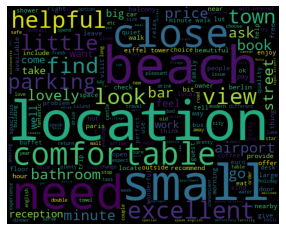

In [35]:
wc=WordCloud(width=500,height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()


### Spelling Correction

In [36]:
from textblob import TextBlob


In [37]:
df.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,go kid xmas holiday like large option lunch ta...,5.0,46,248,4.413043,19
2,spend summer holiday summer 2014 2015 husband ...,5.0,116,645,4.568966,42
3,visit baltic husband bike riding think wrong c...,5.0,52,281,4.423077,27
4,travel number achieve excellent ratio qualitym...,5.0,109,641,4.889908,54
5,decide family holiday destination see rank fam...,4.0,259,1335,4.158301,103


In [38]:
x='waching vidio'
x=TextBlob(x).correct()


In [39]:
#df['reviews']=df['reviews'].apply(lambda x: nlp(x))
#df.head()

In [40]:
#using inbuilt sentiment classifier
from textblob.sentiments import NaiveBayesAnalyzer
x="we will stand together to fight with corona virus we will win together"
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.7813319968776556, p_neg=0.21866800312234405)

### Advanced Text Processing

### N grams


In [41]:
x="Thanks for watching is"
tb=TextBlob(x)
tb.ngrams(2)

[WordList(['Thanks', 'for']),
 WordList(['for', 'watching']),
 WordList(['watching', 'is'])]

In [42]:
list_new=[]
df['reviews'].apply(lambda x: list_new.append(x))
new_list=[]
for i in range(0,6000):
    new_list.append(list_new[i])
    
list_new=new_list
list_new   

['go kid xmas holiday like large option lunch taste quality surround experience hardly recommend',
 'spend summer holiday summer 2014 2015 husband child 4 year old present recommend si high qualified kind helpful animation involve discrection miniclub si super activity offer interesting smart ac balcony offer selection beach si extremly close miniclub offer gazebo shade kid lot bicycle available free completely satisfied lime',
 'visit baltic husband bike riding think wrong child amazed attention detail kindness experience member truly amazing',
 'travel number achieve excellent ratio qualitymoney equipe excellent chef perfect menu vary bar fantastic beach perfect holiday go like dream price high consider forget wollet home require spend money kid happy miniclub efficient daughter cry leave explain well writing',
 'decide family holiday destination see rank family 2013 review keep promise plus extremely kind willing help attention confort kid private playground pinery provide shade lon

### Bag of Words

In [43]:
#x=['this is first sentence','this is second','this is last']

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))
text_counts=cv.fit_transform(list_new)

In [44]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
bow

,0000,005,0100,0112,02,02day,02mbps,03,030405060708,04,...,zoe,zohra,zona,zone,zoo,zooall,zrich,zucchini,zurich,zwina
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
bow.shape

(6000, 18582)

# Machine Learning Algorithm

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [48]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=1000)
lgr = LogisticRegression(random_state=42, max_iter=1000)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=500)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000)
gnb = GaussianNB()

In [49]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [50]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [51]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc,'gnb':gnb}

In [99]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        #f1score=f1_score(y_test, y_pred)
        print(key, " ---> ", ac)
        #print(key, "---> F1Score ", f1score)

In [53]:
df_slice=df.iloc[:6000,:]
df_slice.head()

,reviews,rating,word_counts,char_counts,avg_word_len,stop_words
1,go kid xmas holiday like large option lunch ta...,5.0,46,248,4.413043,19
2,spend summer holiday summer 2014 2015 husband ...,5.0,116,645,4.568966,42
3,visit baltic husband bike riding think wrong c...,5.0,52,281,4.423077,27
4,travel number achieve excellent ratio qualitym...,5.0,109,641,4.889908,54
5,decide family holiday destination see rank fam...,4.0,259,1335,4.158301,103


In [54]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
y=df_slice['rating']
y

1       5.0
2       5.0
3       5.0
4       5.0
5       4.0
       ... 
5996    5.0
5997    5.0
5998    5.0
5999    5.0
6000    5.0
Name: rating, Length: 6000, dtype: object

In [57]:
def KFoldCall(X,y):
   for key in clf.keys(): 
      data=cross_val_score(clf[key],X, y,cv=3)
      print(np.average(data))


In [58]:
KFoldCall(bow,y)

0.5005000000000001
0.524
0.5643333333333334
0.49350000000000005
0.56
0.32983333333333337


In [100]:
classify(bow , y)

SGD  --->  0.5905555555555555
LGR  --->  0.6127777777777778
LGR-CV  --->  0.6083333333333333
SVM  --->  0.5872222222222222
RFC  --->  0.5933333333333334
gnb  --->  0.4066666666666667


## TF-IDF Vectroizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_slice['reviews'])

In [61]:
KFoldCall(pd.DataFrame(X.toarray()),y)

0.5381666666666667
0.5581666666666666
0.5663333333333332
0.5395
0.5591666666666667
0.3516666666666666


In [62]:
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.5738888888888889
LGR  --->  0.6155555555555555
LGR-CV  --->  0.6205555555555555
SVM  --->  0.5755555555555556
RFC  --->  0.5877777777777777
gnb  --->  0.4011111111111111


## Word2Vec

In [63]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [64]:
df_slice['vec'] = df_slice['reviews'].apply(lambda x: get_vec(x))

<ipython-input-64-f44a9c6c6644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['vec'] = df_slice['reviews'].apply(lambda x: get_vec(x))


In [65]:
import pandas as pd
dft=df_slice['vec']
dft.values

array([array([[ 0.68038756,  0.30941156,  0.13773842, -0.05782148, -0.3421492 ,
                0.13832456, -0.35586542,  0.09188242, -0.07687925,  0.09626531,
               -0.48178342, -0.1199261 , -0.04057038, -0.58319277, -0.05841652,
                0.837637  ,  0.3355467 ,  0.14190723, -0.19985095, -0.22342123,
               -0.26575577,  0.51815355, -0.10747014,  0.07528596, -0.49185756,
               -0.18914331,  0.22497265, -0.34463522, -0.07364382,  0.30702654,
               -0.9727897 , -0.62710285,  0.42141852, -0.22858597,  0.35415158,
                0.08508432,  0.53236836, -0.03891305,  0.47303104,  1.0847982 ,
                0.01270613, -0.30970842, -0.13023032,  0.7475713 , -0.5276425 ,
               -0.4300588 ,  0.37553254,  0.38544363,  0.8427678 , -0.20459864,
                0.56420773, -0.1813673 ,  0.12527724,  0.03217662,  0.05958564,
               -0.42684618, -0.10935445, -0.2569386 ,  0.5181198 ,  0.02967324,
               -0.55718386, -0.56981   ,

In [66]:
X = np.concatenate(df_slice['vec'].values, axis = 0)

In [67]:
KFoldCall(pd.DataFrame(X), y)

0.4658333333333333
0.5343333333333333
0.5316666666666666


C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5339999999999999
0.5339999999999999
0.31183333333333335


In [68]:
classify(pd.DataFrame(X), y)

SGD  --->  0.5288888888888889
LGR  --->  0.5388888888888889


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LGR-CV  --->  0.5388888888888889


C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM  --->  0.5344444444444445
RFC  --->  0.5377777777777778
gnb  --->  0.325


## DATA VISUALIZATION

#### Rating Prediction Anaylsis

In [75]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def PlotBarG(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)

        attributes = y_pred.tolist()

        predictions_dict ={'1.0':0,'2.0':0,'3.0':0,'4.0':0,'5.0':0}

        for attr in attributes:
           if attr in predictions_dict.keys():
               predictions_dict[attr] += 1
           else:
               predictions_dict[attr] = 1

        dict1 = OrderedDict(sorted(predictions_dict.items()))
        predictions_dict = json.loads(json.dumps(dict1))
        plt.xlabel("Predicted Rating")
        plt.ylabel("Count")
        plt.title(clf[key])
        plt.bar(sorted(predictions_dict.keys()), predictions_dict.values())
        plt.show()

In [70]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def Acurracy(X, y,z):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    Accu={}
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        Accu[key]=ac*100

    plt.xlabel("Models")
    plt.ylabel("Acuuracy")
    plt.title("Accuracy for different Models using "+str(z))
    plt.bar(sorted(Accu.keys()), Accu.values())
    plt.show()

In [71]:
import matplotlib.pyplot as plt
def Histogram(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    Accu={}
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        Accu[key]=ac
        labels = ['1.0','2.0','3.0','4.0','5.0']
        attributes =y_pred.tolist()
        scores = np.random.random(100)
        
        d = {key:[] for key in labels}
        
        for attribute, score in zip(attributes, scores):
            d[attribute].append(score)
        
        for attribute in d.keys():
            plt.hist(d[attribute], alpha=0.6, label=attribute)

        plt.xlabel('Prediction value')
        plt.ylabel('Count')
        plt.title(Des[key])
        plt.legend()
        plt.show()


### Bag of Words

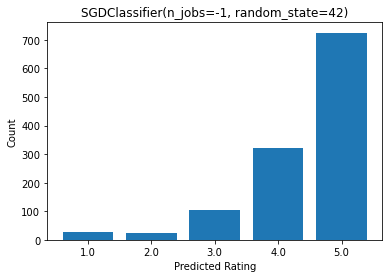

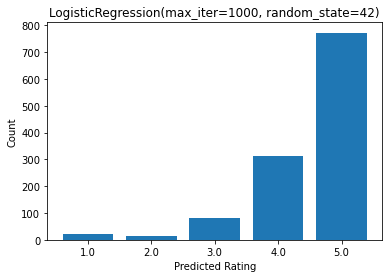

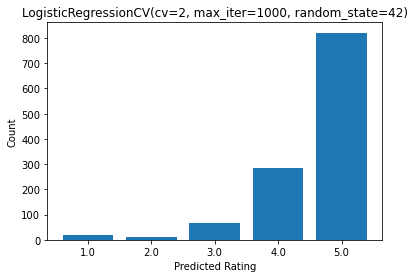

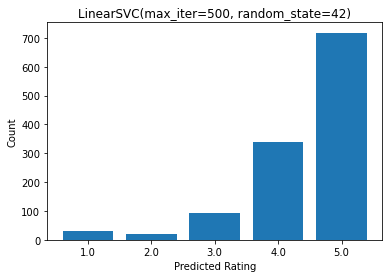

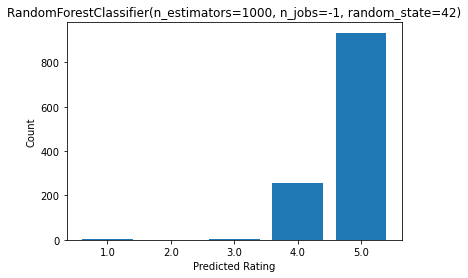

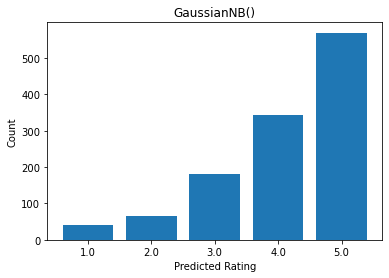

In [76]:
PlotBarG(bow,y)

In [87]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def PlotBarG1(X, y):
    
    for key in clf.keys(): 
        data=sklearn.model_selection.cross_val_predict(clf[key],X, y,cv=3)
        attributes = data.tolist()
        
        predictions_dict ={'1.0':0,'2.0':0,'3.0':0,'4.0':0,'5.0':0}

        for attr in attributes:
           if attr in predictions_dict.keys():
               predictions_dict[attr] += 1
           else:
               predictions_dict[attr] = 1

        dict1 = OrderedDict(sorted(predictions_dict.items()))
        predictions_dict = json.loads(json.dumps(dict1))
        plt.xlabel("Predicted Rating")
        plt.ylabel("Count")
        plt.title(clf[key])
        plt.bar(sorted(predictions_dict.keys()), predictions_dict.values())
        plt.show()

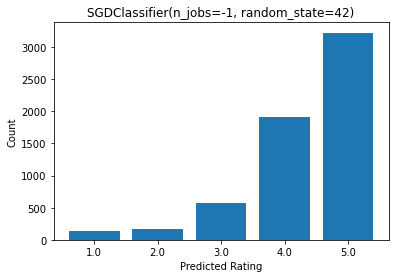

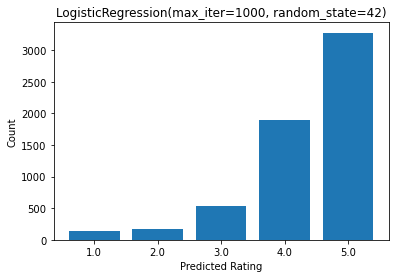

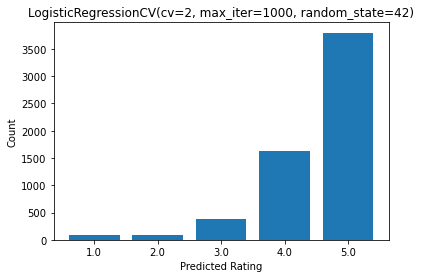

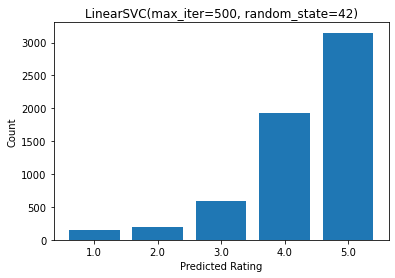

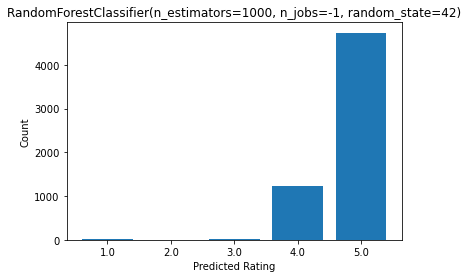

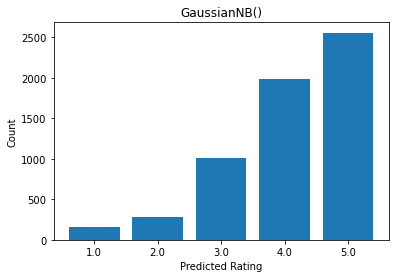

In [88]:
PlotBarG1(bow,y)

In [86]:
 import sklearn.model_selection
data=sklearn.model_selection.cross_val_predict(lgr,bow, y,cv=3)
data
        #attributes = data.tolist()

array(['5.0', '5.0', '5.0', ..., '5.0', '5.0', '5.0'], dtype=object)

In [91]:
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
def AcurracyKFold(X, y,z):
    
    Accu={}
    for key in clf.keys():
        data=cross_val_score(clf[key],X, y,cv=3)
        ac=np.average(data)
        Accu[key]=ac*100

    plt.xlabel("Models")
    plt.ylabel("Acuuracy")
    plt.title("Accuracy for different Models using "+str(z))
    plt.bar(sorted(Accu.keys()), Accu.values())
    plt.show()

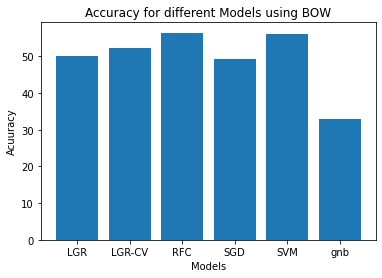

In [94]:
AcurracyKFold(bow, y,"BOW")